In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('BostonHousing(1).csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [14]:
print(df[df.duplicated()])


Empty DataFrame
Columns: [crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat, medv]
Index: []


<Axes: >

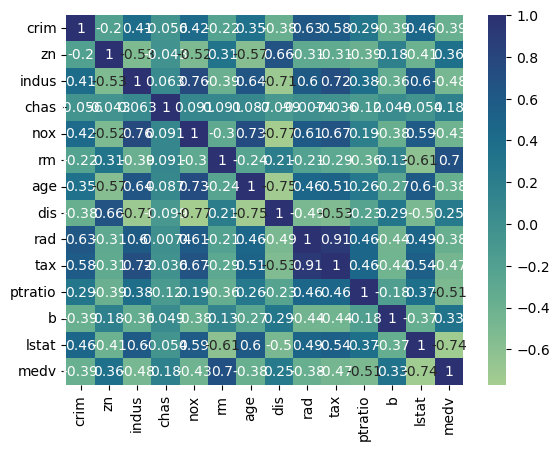

In [15]:
%matplotlib inline
cor_matrix = df.corr()
sns.heatmap(data = cor_matrix, annot = True, cmap = "crest")

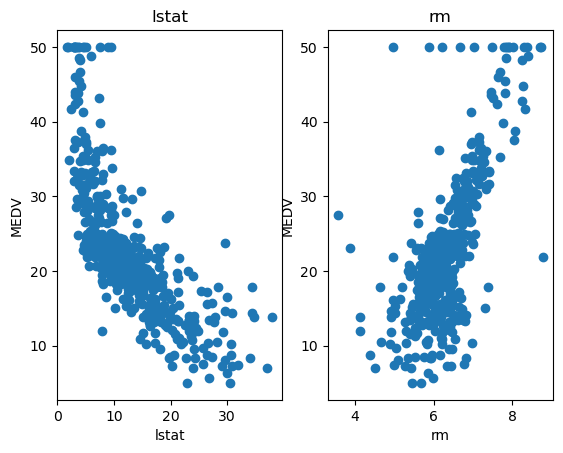

In [16]:
x = ['lstat', 'rm']
Y = df['medv']

for i, col in enumerate(x):
    plt.subplot(1, len(x) , i+1)
    x1 = df[col]
    y = Y
    plt.scatter(x1, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [17]:
X = df[x]

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, random_state = 5)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [19]:
from sklearn.metrics import r2_score

y_predict = linear_reg.predict(X_train)
print("linear regression r square score", r2_score(y_train, y_predict))

linear regression r square score 0.6300745149331701


In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(degree = 2)
X_train_poly = poly_feat.fit_transform(X_train)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [23]:
y_predict_poly = poly_reg.predict(X_train_poly)
print("plynomial regersssion r score", r2_score(y_train, y_predict_poly))

plynomial regersssion r score 0.7425094297364766
